Vacant shape: (1651, 17)
Snow shape: (3685, 71)


,X,Y,SBL,PropertyAddress,Zip,Owner,OwnerAddress,Vacant,neighborhood,VPR_result,completion_date,completion_type_name,valid_until,VPR_valid,Latitude,Longitude,ObjectId
0,NaN,NaN,002.-04-02.4,1920 Park St,13208,Wellington Ward LLC,"100 Windsor Pl Syracuse, NY 13210",Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-8.476690e+06,5.315382e+06,077.-23-25.0,316 Warner Ave,13205,Donna Larode,"321 Warner Ave Syracuse, NY 13205",Residential,Brighton,NaN,NaN,NaN,NaN,NaN,43.0224,-76.1474,2
2,-8.476078e+06,5.315534e+06,077.-10-15.0,2223 State St S & Amherst Ave,13205,Vladimir Dyomin,"2644 Torrey Pines Rd La Jolla, CA 92037",Residential,Brighton,VPR - Valid / Year 2,2022/12/08,VPR Cert Issued - Plan B,2023/12/08,N,43.0234,-76.1419,3
3,-8.479473e+06,5.319570e+06,109.-05-04.0,353 Richmond Ave,13204,Jason Yagan,"353 Richmond Ave Syracuse, NY 13204",Residential,Park Ave,NaN,NaN,NaN,NaN,NaN,43.0499,-76.1724,4
4,-8.475432e+06,5.320042e+06,030.-03-01.0,500 Hawley Ave & Crouse Ave N,13203,City of Syracuse,"233 E Washington St Syracuse, NY 13202",Commercial,Hawley Green,NaN,NaN,NaN,NaN,NaN,43.0530,-76.1361,5


,OBJECTID,DateModifi,NYSStreetI,LeftFromAd,LeftToAddr,RightFromA,RightToAdd,CompleteSt,PreModifie,PreDirecti,...,USERNAME,LeftCountr,RightCou_1,LeftParity,RightParit,LeftESN,RightESN,Shape_Leng,Shape_STLe,Shape__Length
0,1,2009/01/02 00:00:00+00,477437369,201,225,200,224,East Adams Street,,E,...,,,,,,,,58.738397,0.0,58.738397
1,2,2009/01/02 00:00:00+00,477437378,227,299,226,298,East Adams Street,,E,...,,,,,,,,104.683547,0.0,104.683547
2,3,2009/01/02 00:00:00+00,477437366,1,199,2,198,East Adams Street,,E,...,,,,,,,,54.346069,0.0,54.346069
3,4,2009/01/02 00:00:00+00,477437384,551,599,526,598,East Adams Street,,E,...,,,,,,,,70.800560,0.0,70.800560
4,5,2009/01/02 00:00:00+00,477437396,601,625,600,624,East Adams Street,,E,...,,,,,,,,71.957257,0.0,71.957257



--- Missing values (Vacant) ---


,0
valid_until,1276
VPR_result,1276
completion_type_name,1276
completion_date,1276
VPR_valid,1276
X,36
Y,36
Latitude,36
Longitude,36
neighborhood,15



--- Missing values (Snow) ---


,0
OBJECTID,0
DateModifi,0
NYSStreetI,0
LeftFromAd,0
LeftToAddr,0
RightFromA,0
RightToAdd,0
CompleteSt,0
PreModifie,0
PreDirecti,0



Duplicate rows (Vacant): 0
Duplicate rows (Snow): 0


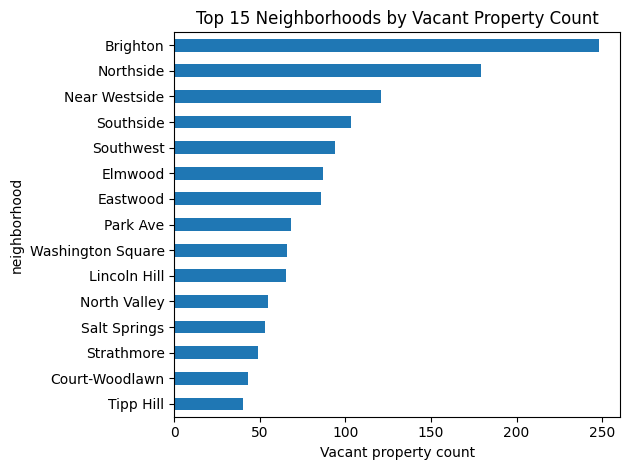

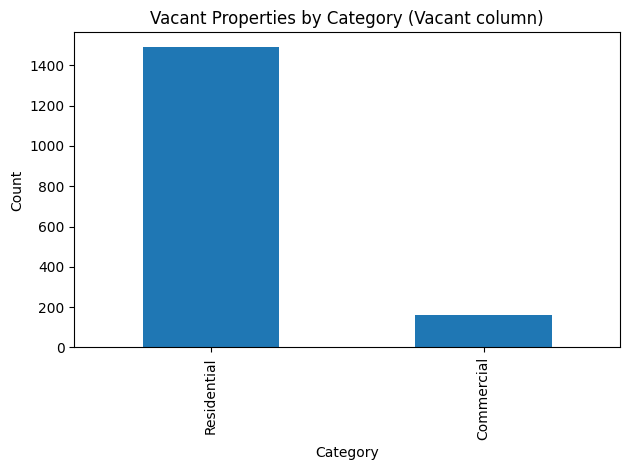

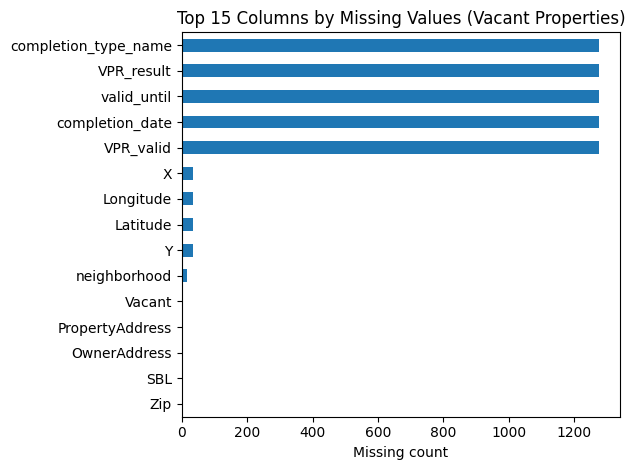

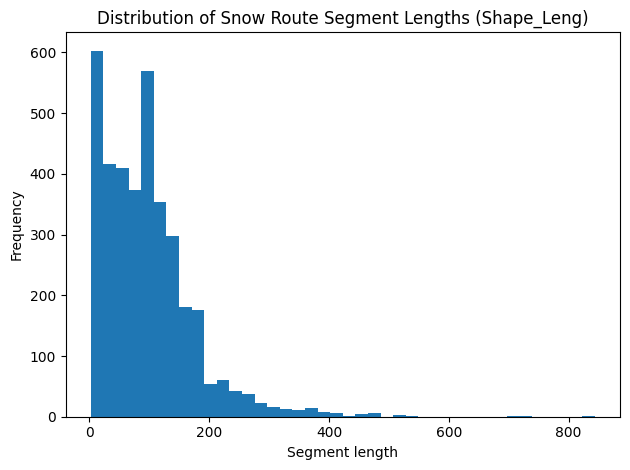

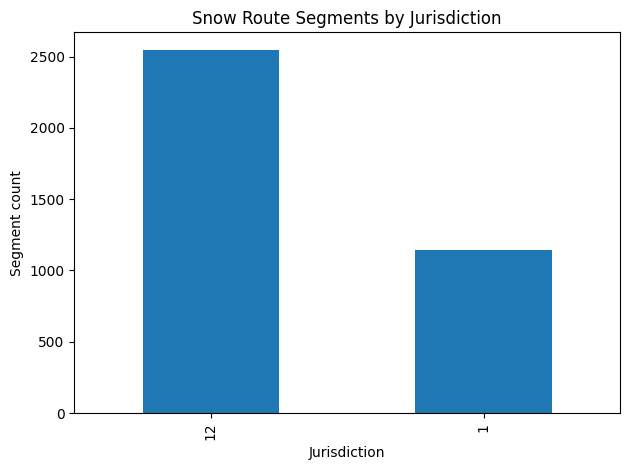

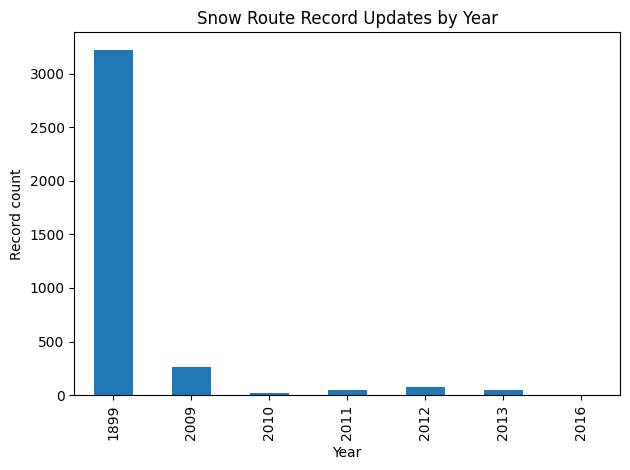

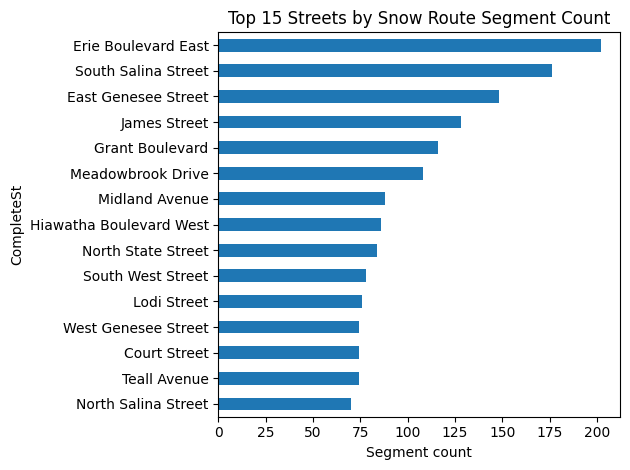

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


vacant_path = "/content/Vacant_Properties.csv"
snow_path   = "/content/Emergency_Snow_Routes.csv"

vacant = pd.read_csv(vacant_path)
snow   = pd.read_csv(snow_path)

print("Vacant shape:", vacant.shape)
print("Snow shape:", snow.shape)

display(vacant.head())
display(snow.head())


print("\n--- Missing values (Vacant) ---")
display(vacant.isna().sum().sort_values(ascending=False).head(15))

print("\n--- Missing values (Snow) ---")
display(snow.isna().sum().sort_values(ascending=False).head(15))

print("\nDuplicate rows (Vacant):", vacant.duplicated().sum())
print("Duplicate rows (Snow):", snow.duplicated().sum())


for col in ["completion_date", "valid_until"]:
    if col in vacant.columns:
        vacant[col] = pd.to_datetime(vacant[col], errors="coerce")

if "DateModifi" in snow.columns:
    snow["DateModifi"] = pd.to_datetime(snow["DateModifi"], errors="coerce")




if "neighborhood" in vacant.columns:
    plt.figure()
    vacant["neighborhood"].value_counts().head(15).sort_values().plot(kind="barh")
    plt.title("Top 15 Neighborhoods by Vacant Property Count")
    plt.xlabel("Vacant property count")
    plt.tight_layout()
    plt.show()

# Viz 2: Vacancy category distribution
# NOTE: In your file, 'Vacant' looks like a category field (e.g., Residential/Commercial)
if "Vacant" in vacant.columns:
    plt.figure()
    vacant["Vacant"].value_counts().plot(kind="bar")
    plt.title("Vacant Properties by Category (Vacant column)")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Viz 3: Missingness bar chart (Vacant top 15)
plt.figure()
vacant.isna().sum().sort_values(ascending=False).head(15).sort_values().plot(kind="barh")
plt.title("Top 15 Columns by Missing Values (Vacant Properties)")
plt.xlabel("Missing count")
plt.tight_layout()
plt.show()

# Viz 4: Snow route segment length distribution
# Choose the best available length field
length_candidates = [c for c in snow.columns if c.lower() in ["shape_leng", "shape__length", "shape_length"]]
if length_candidates:
    len_col = length_candidates[0]
    plt.figure()
    snow[len_col].dropna().plot(kind="hist", bins=40)
    plt.title(f"Distribution of Snow Route Segment Lengths ({len_col})")
    plt.xlabel("Segment length")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


if "JURISDICTI" in snow.columns:
    plt.figure()
    snow["JURISDICTI"].value_counts().plot(kind="bar")
    plt.title("Snow Route Segments by Jurisdiction")
    plt.xlabel("Jurisdiction")
    plt.ylabel("Segment count")
    plt.tight_layout()
    plt.show()

# Viz 6: Snow route updates by year (if DateModifi exists)
if "DateModifi" in snow.columns and snow["DateModifi"].notna().any():
    plt.figure()
    snow["DateModifi"].dt.year.value_counts().sort_index().plot(kind="bar")
    plt.title("Snow Route Record Updates by Year")
    plt.xlabel("Year")
    plt.ylabel("Record count")
    plt.tight_layout()
    plt.show()

# Viz 7: Top 15 streets by snow-route segment count (if CompleteSt exists)
street_col = "CompleteSt" if "CompleteSt" in snow.columns else None
if street_col:
    plt.figure()
    snow[street_col].value_counts().head(15).sort_values().plot(kind="barh")
    plt.title("Top 15 Streets by Snow Route Segment Count")
    plt.xlabel("Segment count")
    plt.tight_layout()
    plt.show()
